# 데이터 불러오기(최적의 길이 찾기)

In [100]:
import pandas as pd
import numpy as np
intro= pd.read_csv('olist_products_dataset.csv')
intro

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


# 데이터 탐색

In [101]:
intro.info()
intro.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# 그룹화

In [102]:
name_bins = list(range(0, int(intro['product_name_lenght'].max()) + 20, 20))
name_labels = [f'{i}-{i+19}' for i in name_bins[:-1]]

if name_labels:
    name_labels[-1] = f'{name_bins[-2]}+'

intro['name_lenght_group'] = pd.cut(
    intro['product_name_lenght'],
    bins=name_bins,
    labels=name_labels,
    right=False,
    include_lowest=True
)

print(" product_name_lenght 그룹화 결과 (빈도)")
print(intro['name_lenght_group'].value_counts().sort_index())


print("\n product_description_lenght 그룹화 시작")
# 지정된 경계값 (0~200, 200~400, 400~600, 600~800, 1000이상)
desc_bins = [0, 200, 400, 600, 800, 1000, intro['product_description_lenght'].max() + 1]
desc_labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+']

intro['description_lenght_group'] = pd.cut(
    intro['product_description_lenght'],
    bins=desc_bins,
    labels=desc_labels,
    right=False,
    include_lowest=True
)

print("\n product_description_lenght 그룹화 결과 (빈도)")
print(intro['description_lenght_group'].value_counts().sort_index())

#  3. product_photos_qty 그룹화 (1, 2, 3, 4이상)
print("\n--- product_photos_qty 그룹화 시작 ---")
photo_max = intro['product_photos_qty'].max()
photo_bins = [0, 1, 2, 3, 4, photo_max + 1]

# 레이블 설정: 0이상 1미만은 0개, 1이상 2미만은 1개...
photo_labels = ['0개', '1개', '2개', '3개', '4개 이상']

intro['photos_qty_group'] = pd.cut(
    intro['product_photos_qty'],
    bins=photo_bins,
    labels=photo_labels,
    right=False, # [0, 1) -> 0개
    include_lowest=True
)

# 4개 이상 그룹을 정확히 처리하기 위해 4 이상인 값들은 '4개 이상'으로 통일 (np.cut의 특성상 마지막 bin에 nan이 생길 수 있음)
intro['photos_qty_group'] = intro['photos_qty_group'].mask(intro['product_photos_qty'] >= 4, '4개 이상')
# pd.cut의 특성상 0 미만의 값(이상치/결측)은 NaN 처리되지만, 여기선 0부터 시작했으므로 큰 문제는 없습니다.
intro['photos_qty_group'] = intro['photos_qty_group'].fillna('4개 이상') # 혹시 모를 결측은 4개 이상으로 처리

print("\n product_photos_qty 그룹화 결과 (빈도)")
print(intro['photos_qty_group'].value_counts().sort_index())

 product_name_lenght 그룹화 결과 (빈도)
name_lenght_group
0-19       290
20-39     6127
40-59    23032
60+       2892
Name: count, dtype: int64

 product_description_lenght 그룹화 시작

 product_description_lenght 그룹화 결과 (빈도)
description_lenght_group
0-200       3011
200-400     7154
400-600     6176
600-800     4942
800-1000    3297
1000+       7761
Name: count, dtype: int64

--- product_photos_qty 그룹화 시작 ---

 product_photos_qty 그룹화 결과 (빈도)
photos_qty_group
0개           0
1개       16489
2개        6263
3개        3860
4개 이상     6339
Name: count, dtype: int64


# 그룹화 시각화

/tmp/ipython-input-2609703421.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='Pastel1')
/tmp/ipython-input-2609703421.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='Pastel1')
/tmp/ipython-input-2609703421.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='Pastel1')
/tmp/ipython-input-2609703421.py:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missi

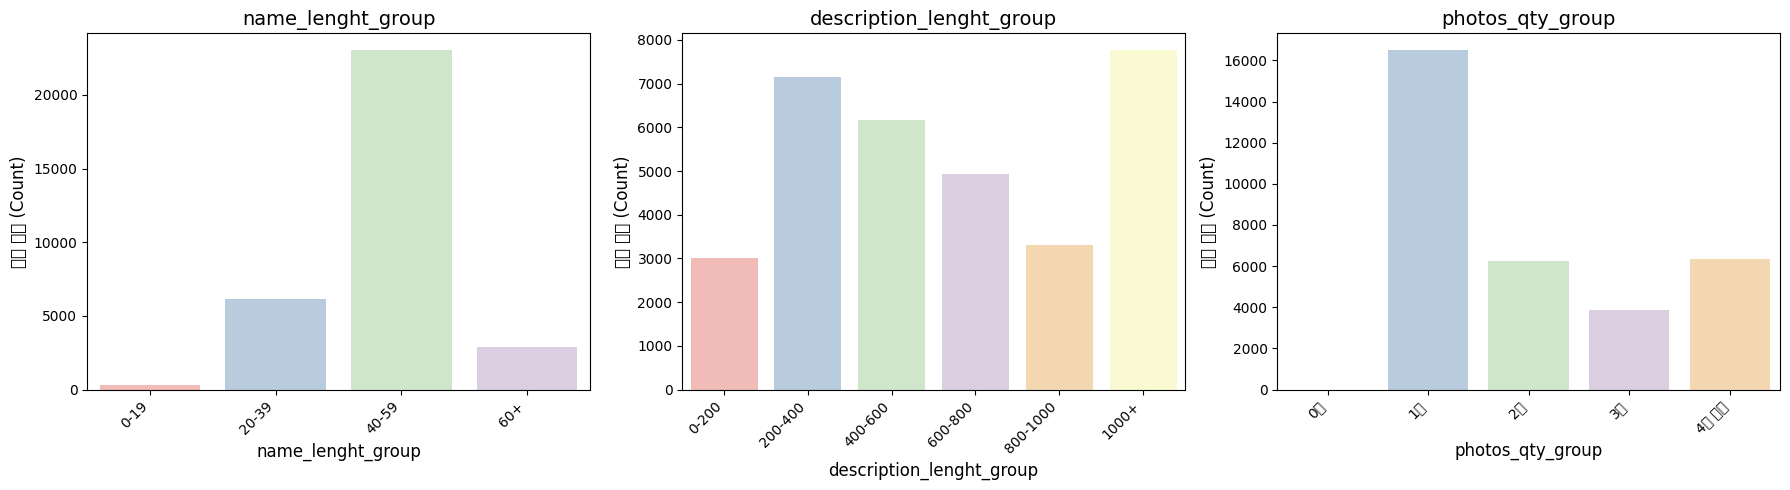

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
group_cols = [
    'name_lenght_group',
    'description_lenght_group',
    'photos_qty_group'
]

plt.figure(figsize=(18, 5))

# 각 그룹 변수별로 시각화
for i, col in enumerate(group_cols):
    plt.subplot(1, 3, i + 1)

    # 1. 그룹별 빈도수 계산:
    # value_counts()를 사용하여 각 그룹에 속하는 상품의 개수를 계산합니다.
    # sort_index()를 사용하여 그룹 순서대로 막대를 정렬합니다.
    grouped_counts = intro[col].value_counts().sort_index()

    # 2. Seaborn Bar Plot (Count Plot) 생성:
    # x축: 그룹 레이블, y축: 상품 개수 (빈도)
    sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='Pastel1')

    # 그래프 제목 및 축 레이블 설정
    plt.title(f'{col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('상품 개수 (Count)', fontsize=12)

    # x축 레이블 회전 (이름이 겹치지 않도록)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

* 제목 길이는 40-60자가 가장 많았다.
* 설명 길이는 1000+자가 가장 많았고, 200-400자부터 서서히 수가 줄어든다.
* 사진 개수는 1장이 가장 많았다.

# 구매율 계산(conversion_rate)

In [104]:
orderitem = pd.read_csv('olist_order_items_dataset.csv')
orderitem



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [105]:
product_sales_count = orderitem.groupby('product_id').agg(
    total_transactions=('order_item_id', 'count'), # 상품별 총 거래된 횟수
    total_revenue=('price', 'sum')                # 상품별 총 매출
).reset_index()
product_sales_count.sort_values(by= 'total_transactions', ascending= False).head(20)

,product_id,total_transactions,total_revenue
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527,37608.90
19742,99a4788cb24856965c36a24e339b6058,488,43025.56
8613,422879e10f46682990de24d770e7f83d,484,26577.22
7364,389d119b48cf3043d311335e499d9c6b,392,21440.59
7079,368c6c730842d78016ad823897a372db,388,21056.80
10840,53759a2ecddad2bb87a079a1f1519f73,373,20387.20
27039,d1c427060a0f73f6b889a5c7c61f2ac4,343,47214.51
10867,53b36df67ebb7c41585e8d54d6772e08,323,37683.42
2794,154e7e31ebfa092203795c972e5804a6,281,6325.19
8051,3dd2a17168ec895c781a9191c1e95ad7,274,41082.60


In [106]:
total_products = len(product_sales_count)
product_sales_count['conversion_rate'] = (product_sales_count['total_transactions'] / total_products) * 100

print("--- 구매 전환율 (conversion_rate) 피처 추가 완료 ---")
print(product_sales_count[['product_id', 'total_transactions', 'conversion_rate']].sort_values(by='total_transactions', ascending=False))


--- 구매 전환율 (conversion_rate) 피처 추가 완료 ---
                             product_id  total_transactions  conversion_rate
22112  aca2eb7d00ea1a7b8ebd4e68314663af                 527         1.599344
19742  99a4788cb24856965c36a24e339b6058                 488         1.480987
8613   422879e10f46682990de24d770e7f83d                 484         1.468848
7364   389d119b48cf3043d311335e499d9c6b                 392         1.189645
7079   368c6c730842d78016ad823897a372db                 388         1.177506
...                                 ...                 ...              ...
32931  ffd7628b0b0b98ebc549e8e4c54a59af                   1         0.003035
32930  ffd63ee42a5c8cc5a15a1c8e2aa50011                   1         0.003035
16     002959d7a0b0990fe2d69988affcbc80                   1         0.003035
15     002552c0663708129c0019cc97552d7d                   1         0.003035
13     0021a87d4997a48b6cef1665602be0f5                   1         0.003035

[32951 rows x 3 columns]


In [107]:
intro
intro_merged = pd.merge(
    intro,
    product_sales_count,
    on='product_id',
    how='left'
)
intro_merged
intro_merged['conversion_rate2'] = (product_sales_count['total_transactions'] / total_products) * 100


# 구매율에 따른 최적 제목/설명 길이 및 사진 개수

/tmp/ipython-input-579133538.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_cr = intro_merged.groupby(col)['conversion_rate'].mean().sort_index()
/tmp/ipython-input-579133538.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_cr.index, y=grouped_cr.values, palette='viridis')
/tmp/ipython-input-579133538.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_cr = intro_merged.groupby(col)['conversion_rate'].mean().sort_index()
/tm

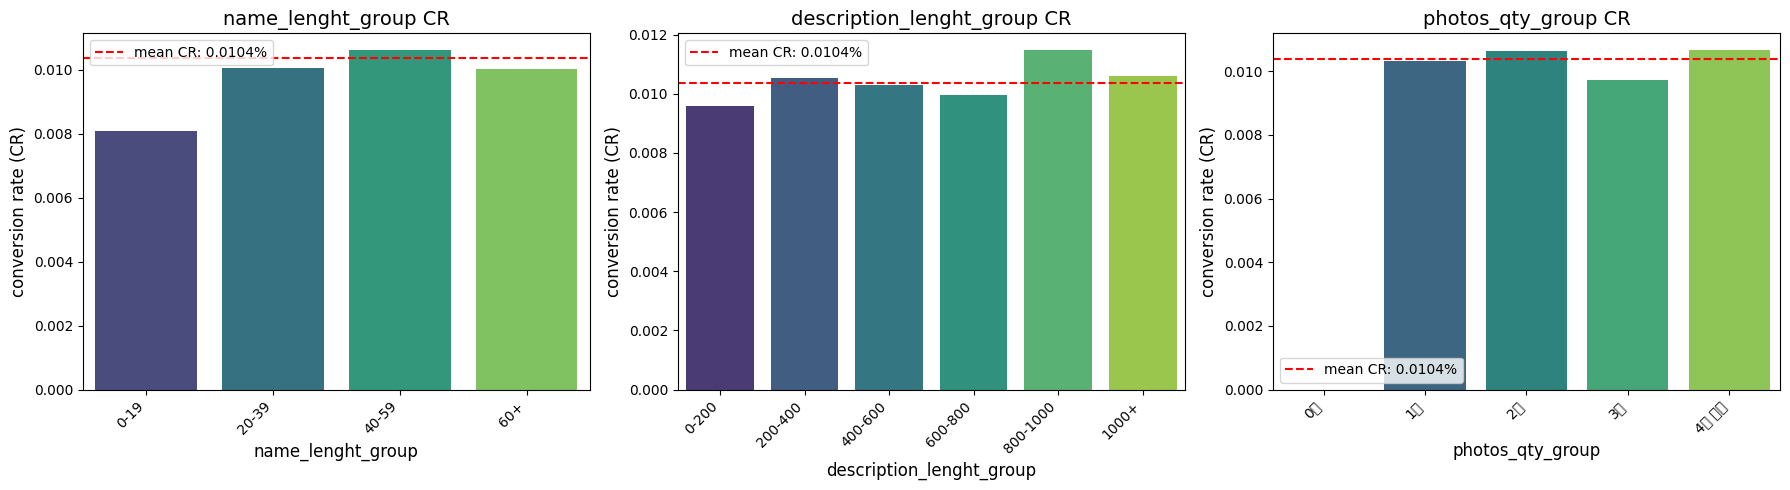

In [108]:
group_cols = [
    'name_lenght_group',
    'description_lenght_group',
    'photos_qty_group'
]

# 전체 상품의 평균 CR 계산 (벤치마크용)
global_mean_cr = intro_merged['conversion_rate'].mean()

plt.figure(figsize=(18, 5))

# 각 그룹 변수별로 시각화
for i, col in enumerate(group_cols):
    plt.subplot(1, 3, i + 1)

    # 1. 그룹별 평균 CR 계산:
    # groupby를 사용하여 각 그룹의 평균 CR을 구하고, 그룹 순서대로 정렬합니다.
    # .sort_index()를 사용하여 그룹화 시 설정한 순서대로 막대를 정렬합니다.
    grouped_cr = intro_merged.groupby(col)['conversion_rate'].mean().sort_index()

    # 2. Seaborn Bar Plot 생성:
    sns.barplot(x=grouped_cr.index, y=grouped_cr.values, palette='viridis')

    # 그래프 제목 및 축 레이블 설정
    plt.title(f'{col} CR', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('conversion rate (CR)', fontsize=12)

    # x축 레이블 회전
    plt.xticks(rotation=45, ha='right')

    # 수평선 추가: 전체 평균 CR (벤치마크)
    plt.axhline(global_mean_cr, color='red', linestyle='--', linewidth=1.5, label=f'mean CR: {global_mean_cr:.4f}%')
    plt.legend()

plt.tight_layout()
plt.show()





*   제목 길이의 경우 40-60 사이의 단어 수로 작성했을 때 가장 구매율이 높았고, 20-40, 60+ 순으로 낮아진다.
*   설명 길이의 경우 800-1000 사이의 단어 수로 작성했을 때 가장 구매율이 높았다. 200-400과 1000이상 순으로 낮아진다.
*   사진 개수의 경우 2장과 4+장이 가장 구매율이 높았다. 다음으로는 1장, 3장 순으로 낮아진다.









/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/

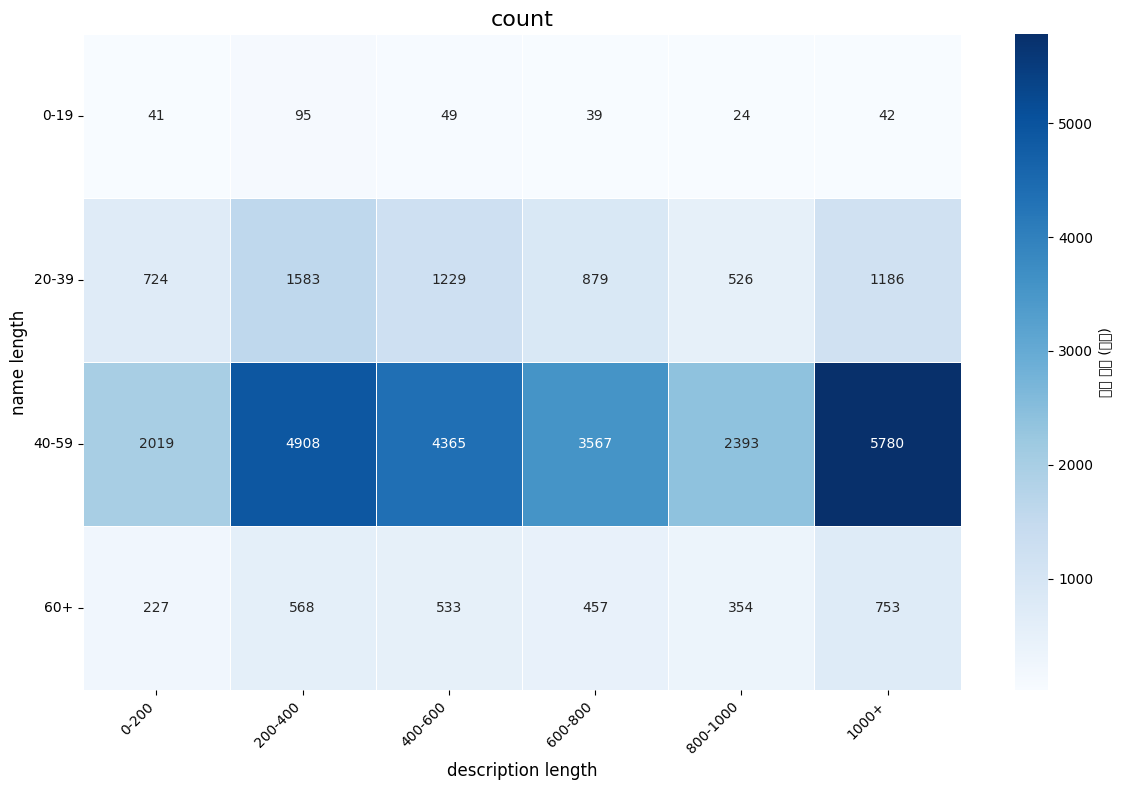

In [109]:
# 1. 두 그룹 변수 간의 교차표 (Crosstab) 생성
# 'name_lenght_group'을 인덱스(행)로, 'description_lenght_group'을 컬럼(열)로 설정
crosstab_matrix = pd.crosstab(
    intro_merged['name_lenght_group'],
    intro_merged['description_lenght_group']
)

# 2. 교차표를 기반으로 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    crosstab_matrix,
    annot=True,         # 셀 안에 숫자 값 표시
    fmt='d',            # 숫자를 정수 형태로 표시 (빈도수이므로)
    cmap='Blues',       # 색상 맵 설정
    linewidths=.5,      # 셀 경계선 설정
    cbar_kws={'label': '상품 개수 (빈도)'}
)

plt.title('count', fontsize=16)
plt.xlabel('description length', fontsize=12)
plt.ylabel('name length', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3977185750.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cr_matrix = intro_merged.pivot_table(


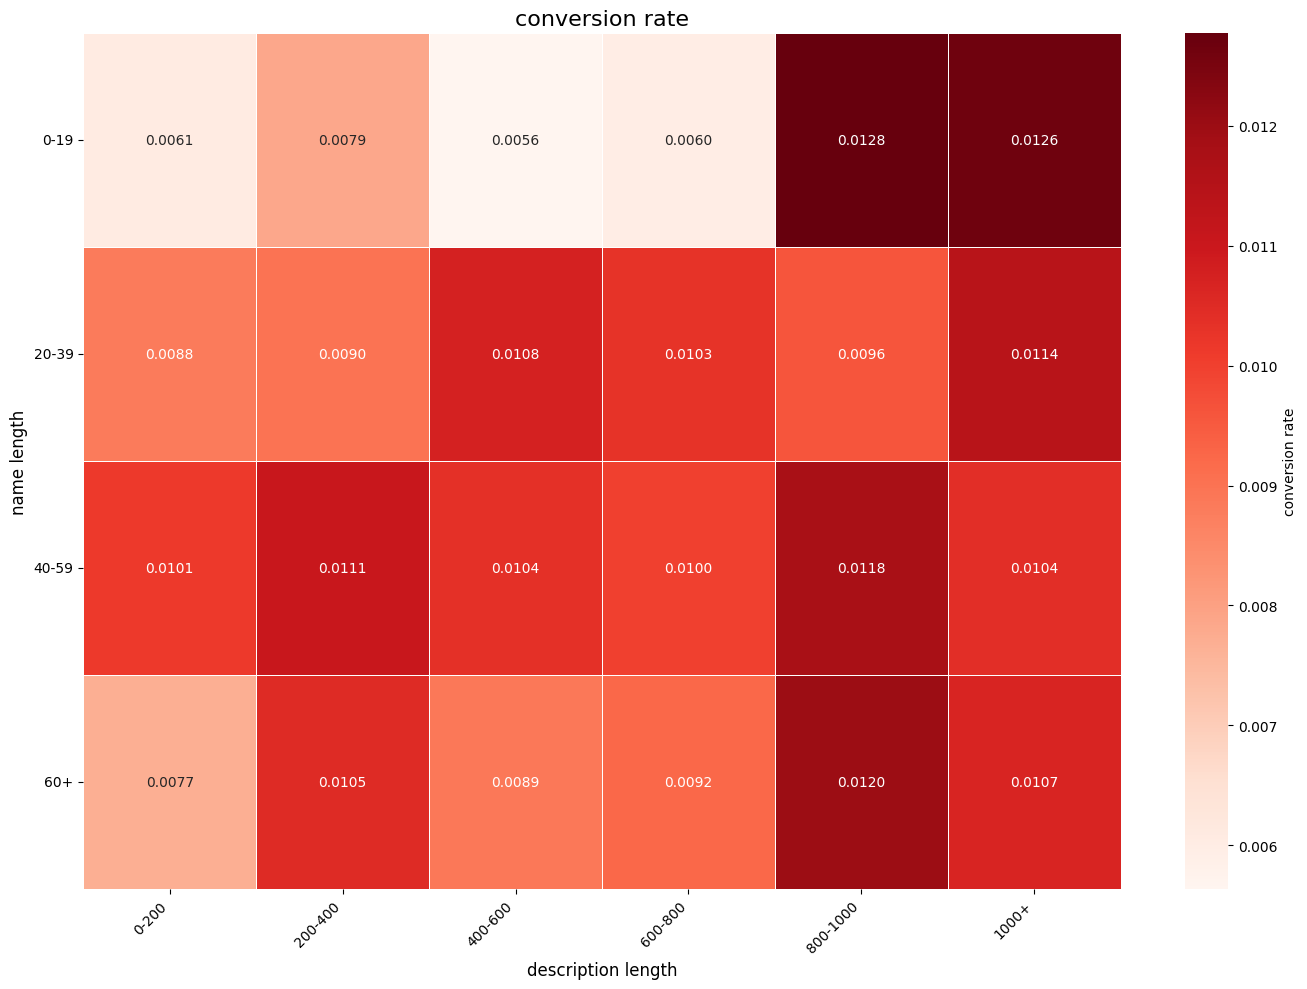

In [110]:
cr_matrix = intro_merged.pivot_table(
    index='name_lenght_group',
    columns='description_lenght_group',
    values='conversion_rate',
    aggfunc='mean'
)

# 2. 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(
    cr_matrix,
    annot=True,         # 셀 안에 숫자 값 표시
    fmt='.4f',          # 소수점 4자리까지 표시 (CR은 소수점 값이 중요하므로)
    cmap='Reds',      # 색상 맵 설정 (높은 값이 진한 색으로 표시됨)
    linewidths=.5,      # 셀 경계선 설정
    cbar_kws={'label': 'conversion rate'}
)

plt.title('conversion rate', fontsize=16)
plt.xlabel('description length', fontsize=12)
plt.ylabel('name length', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* 첫번째 히트맵은 가장 많이 사용하는 조합

* 두번째 히트맵은 구매율이 가장 높은 조합

# 데이터 불러오기(중요 단어 찾기)

In [111]:
reviews= pd.read_csv('olist_order_reviews_dataset.csv')


In [112]:
merged= pd.merge(
    orderitem,
    reviews,
    on='order_id',
    how='left'
)
merged
merged_cleaned = merged.dropna(subset=['review_comment_message'])
merged_cleaned


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,67b1ab8f3ec19d5a90f153f21757d3a1,1.0,NaN,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00,2018-04-02 00:52:01
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,7e92c32ae297ef950ee69781d9f1760c,5.0,NaN,A caixa do produto veio com uma pequena avaria...,2018-03-30 00:00:00,2018-03-30 04:04:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113284,ffeeb911d070bea3dd20bd5fd01da5e8,1,a5341e3f8155dbb3e62323d3ea289729,ff063b022a9a0aab91bad2c9088760b7,2017-10-13 19:25:54,79.50,16.19,49c3df0bcbf2d73e888164aa215e55a4,5.0,NaN,Adorei o produto ótimo e recomendo.,2017-10-26 00:00:00,2017-10-27 19:32:58
113298,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,2b97d83f7c2b3a3b4285174e77379fbc,5.0,NaN,Tudo ok,2018-04-08 00:00:00,2018-04-12 20:25:15
113299,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,2b97d83f7c2b3a3b4285174e77379fbc,5.0,NaN,Tudo ok,2018-04-08 00:00:00,2018-04-12 20:25:15
113302,fffb0b1a50e65c449020434fa835e078,1,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96,8d5c94767f299be3d6f88fd407377fa8,1.0,NaN,A compra foi feita Há mais de um mes e ainda n...,2017-05-17 00:00:00,2017-05-17 12:51:43


리뷰 내용이 없는 행은 제거했다.

In [113]:
intro

merged2 = pd.merge(
    intro,
    merged_cleaned,
    on='product_id',
    how='left'
)
merged2
merged2['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

/tmp/ipython-input-310661316.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_cr.index, y=grouped_cr.values, palette='viridis')
/tmp/ipython-input-310661316.py:53: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-310661316.py:53: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-310661316.py:53: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-310661316.py:53: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-310661316.py:53: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


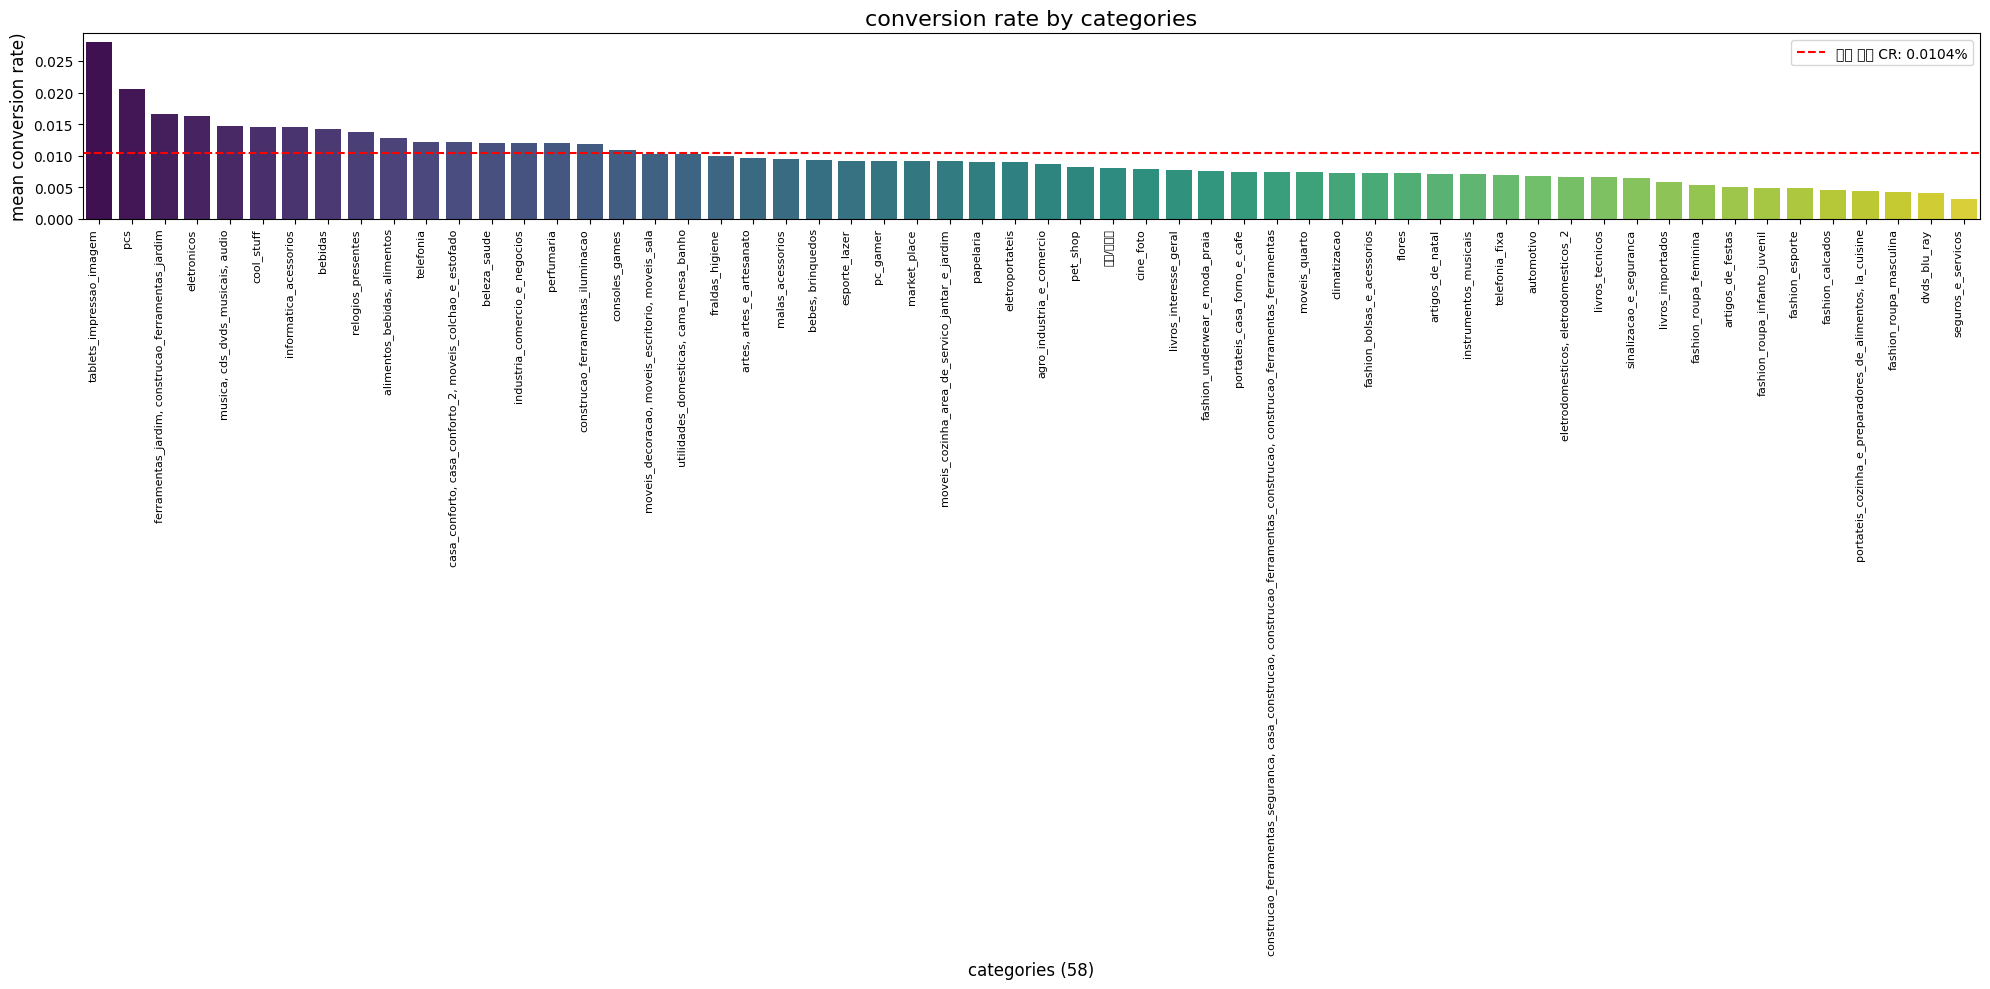

In [114]:
file_name = "category.csv"

# 1. 사용자 정의 카테고리 매핑 파일 로드 (CSV)
try:
    # 파일을 다시 읽어서 카테고리 맵을 준비합니다.
    category_map_df = pd.read_csv('category.csv')
except:
    # 분리 문자가 세미콜론일 경우를 대비하여 재시도
    category_map_df = pd.read_csv('category.csv', sep=';')

# 2. 매핑 딕셔너리 생성
category_map_df['포르투갈어 (원본)'] = category_map_df['포르투갈어 (원본)'].astype(str)

category_map_58 = {}
for index, row in category_map_df.iterrows():
    # 콤마로 분리된 원본 카테고리를 새 그룹 이름에 1:1로 매핑
    original_categories = [cat.strip() for cat in row['포르투갈어 (원본)'].split(',')]
    new_group_name = row['포르투갈어 (원본)']

    for cat in original_categories:
        category_map_58[cat] = new_group_name

# NaN (결측치) 카테고리 처리
category_map_58[np.nan] = '기타/미분류'

# 3. 데이터프레임에 58개 통합 카테고리 컬럼 추가
intro_merged['category_unified_58'] = intro_merged['product_category_name'].map(category_map_58).fillna('기타/미분류')

# 4. CR 시각화

group_col = 'category_unified_58'
global_mean_cr = intro_merged['conversion_rate'].mean()

plt.figure(figsize=(20, 10))

# 그룹별 평균 CR 계산: 새로운 58개 그룹별로 평균 CR을 구하고, CR이 높은 순으로 정렬합니다.
grouped_cr = intro_merged.groupby(group_col)['conversion_rate'].mean().sort_values(ascending=False)

# Seaborn Bar Plot 생성
sns.barplot(x=grouped_cr.index, y=grouped_cr.values, palette='viridis')

plt.title('conversion rate by categories', fontsize=16)
plt.xlabel('categories (58)', fontsize=12)
plt.ylabel('mean conversion rate)', fontsize=12)

# 가독성을 위해 x축 레이블 90도 회전
plt.xticks(rotation=90, ha='right', fontsize=8)

# 전체 평균 CR 수평선 추가
plt.axhline(global_mean_cr, color='red', linestyle='--', linewidth=1.5, label=f'전체 평균 CR: {global_mean_cr:.4f}%')
plt.legend()

plt.tight_layout()
plt.show()



74개 카테고리 -> 56개 카테고리로 정리하여 구매율 추이를 살펴보았다.

In [115]:
category_map_df
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
# 1. 매핑 딕셔너리 생성 ('category_map_df'의 내용을 사용)
category_map_df['포르투갈어 (원본)'] = category_map_df['포르투갈어 (원본)'].astype(str)

category_map_custom = {}
for index, row in category_map_df.iterrows():
    original_categories = [cat.strip() for cat in row['포르투갈어 (원본)'].split(',')]
    new_group_name = row['한국어 번역 (의미)']
    for cat in original_categories:
        category_map_custom[cat] = new_group_name
category_map_custom[np.nan] = '기타/미분류'


# 2. merged2에 사용자 정의 그룹핑 컬럼 추가
merged2['category_unified_custom'] = merged2['product_category_name'].map(category_map_custom).fillna('기타/미분류')

# 3. 텍스트 분석을 위한 데이터 준비
# review_comment_message에 결측치(NaN)가 없는 행만 선택하여 텍스트 분석 전용 데이터프레임 생성
df_text = merged2.dropna(subset=['review_comment_message', 'category_unified_custom']).copy()

# 모든 리뷰 텍스트를 카테고리별로 하나의 큰 문자열로 합치기
category_reviews = df_text.groupby('category_unified_custom')['review_comment_message'].apply(lambda x: " ".join(x.astype(str)))

# 4. TF-IDF 벡터화 및 중요 단어 추출
# 포르투갈어 불용어 목록 (일반적인 목록 사용)
portuguese_stop_words = [
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao',
    'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
    'ao', 'ele', 'das', 'tem', 'aqui', 'eu', 'me', 'vc', 'mt', 'muito', 'só', 'pra', 'pela', 'pelo', 'ser'
]

# TfidfVectorizer 초기화 (중요 단어 및 n-gram 추출)
vectorizer = TfidfVectorizer(
    stop_words=portuguese_stop_words,
    ngram_range=(1, 2), # 단어 하나 또는 두 단어 조합(구) 분석
    max_features=50000,
    lowercase=True,
    token_pattern=r'[a-zA-Záàâãéèêíóôõúüçñ]+' # 특수문자 제거
)

# 텍스트를 벡터화 (TF-IDF 행렬 생성)
tfidf_matrix = vectorizer.fit_transform(category_reviews)
feature_names = vectorizer.get_feature_names_out()

# TF-IDF 점수 데이터프레임 생성
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=category_reviews.index)


# 5. 결과 출력 (카테고리별 중요 단어 Top 10)
def get_top_tfidf_words(df_row, top_n=10):
    sorted_scores = df_row.sort_values(ascending=False)
    top_words = sorted_scores.head(top_n).index.tolist()
    top_scores = sorted_scores.head(top_n).values.tolist()
    return list(zip(top_words, [f"{s:.3f}" for s in top_scores]))

print("\n--- 58개 사용자 정의 카테고리별 TF-IDF 기반 중요 단어 ---")
# 상위 10개 카테고리만 예시로 출력
for category in df_tfidf.index[:10]:
    top_words = get_top_tfidf_words(df_tfidf.loc[category])
    print(f"\n[카테고리: {category}]")
    print(", ".join([f"{word} ({score})" for word, score in top_words]))

print("\n(전체 58개 카테고리의 결과는 df_tfidf 데이터프레임에 저장되어 있으며, 각 카테고리의 특징을 가장 잘 나타내는 단어들입니다.)")


--- 58개 사용자 정의 카테고리별 TF-IDF 기반 중요 단어 ---

[카테고리: DVD & 블루레이]
d moto (0.217), moto x (0.217), produto (0.201), filme (0.197), película vidro (0.197), produto película (0.197), encomendei paguei (0.183), paguei unidades (0.155), moto (0.155), ocorre (0.143)

[카테고리: PC 게이밍]
controle balde (0.297), sinalizando (0.297), balde peças (0.275), q ia (0.275), apenas controle (0.259), produto tbm (0.259), balde (0.245), recebi (0.244), peças não (0.234), recebi outra (0.215)

[카테고리: 가구 & 인테리어, 사무용 가구, 거실 가구]
produto (0.461), não (0.327), recebi (0.237), prazo (0.200), entrega (0.170), chegou (0.143), veio (0.138), comprei (0.138), é (0.134), foi (0.131)

[카테고리: 가전제품, 가전제품 2 (세분화된 가전)]
produto (0.490), não (0.290), prazo (0.241), entrega (0.183), chegou (0.164), antes (0.146), veio (0.140), recebi (0.136), recomendo (0.131), foi (0.119)

[카테고리: 개인용 컴퓨터 (PC)]
produto (0.350), prazo (0.204), antes (0.175), antes prazo (0.158), entrega (0.128), eficaz entrega (0.119), ultrabook (0.119), recomendo (0

In [117]:
df_tfidf

,aaa,ab,ab não,abaixar,abaixar frete,abaixo,abaixo esperado,abaixo expectativa,abaixo mercado,abaixo qualidade,...,úteis foi,úteis não,úteis porém,úteis produto,úteis recomendo,útil,útil após,útil bem,útil produto,útil recomendo
category_unified_custom,,,,,,,,,,,,,,,,,,,,,
DVD & 블루레이,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC 게이밍,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"가구 & 인테리어, 사무용 가구, 거실 가구",0.000000,0.000000,0.000000,0.000000,0.000000,0.000656,0.000903,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001098,0.000000,0.000000,0.000903,0.000000
"가전제품, 가전제품 2 (세분화된 가전)",0.000000,0.000000,0.000000,0.000000,0.000000,0.006422,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010757,0.000000,0.000000,0.000000,0.000000
개인용 컴퓨터 (PC),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
건축 공구 & 조명,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"건축/공구 & 안전 장비, 집 & 건축 자재, 건축 공구 & 건축 자재, 건축 공구 (도구)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
게임 콘솔 & 게임,0.007378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"공구 & 정원 용품, 건축 공구 & 정원",0.000000,0.004158,0.000000,0.000000,0.000000,0.001400,0.000000,0.000000,0.002079,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


건축 공구: 부품관련 누락이 많이 발생함을 알 수 있음.
하지만 여전히 불용어, 흔한단어가 많이 발견되어 분석 어렵. 배송 관련 단어나 조금 더 고차원적 불용어 제거가 필요해보임.

+ 긍정리뷰/부정리뷰 분리 분석 -> 성공요인/실패요인
+ 고차원적 불용어 제거

# 피드백 -> 재시도

In [118]:
df_positive = merged2[merged2['review_score'] >= 4].dropna(subset=['review_comment_message', 'category_unified_custom']).copy()

# 2. 텍스트 합치기 (긍정 리뷰만)
category_reviews_positive = df_positive.groupby('category_unified_custom')['review_comment_message'].apply(lambda x: " ".join(x.astype(str)))

# 3. 강화된 불용어 목록 정의 (물류/주문 관련 단어 제거)
portuguese_stop_words_enhanced = [
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao',
    'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
    'ao', 'ele', 'das', 'tem', 'aqui', 'eu', 'me', 'vc', 'mt', 'muito', 'só',
    'pra', 'pela', 'pelo', 'ser',
    # 물류/주문 관련 단어 추가
    'produto', 'recebi', 'prazo', 'entrega', 'chegou', 'veio', 'comprei',
    'foi', 'receber', 'compra', 'entregue', 'será', 'bom', 'ótimo', 'demorou'
]

# 4. TF-IDF 벡터화 (긍정 리뷰)
vectorizer_pos = TfidfVectorizer(
    stop_words=portuguese_stop_words_enhanced,
    ngram_range=(1, 2),
    max_features=50000,
    lowercase=True,
    token_pattern=r'[a-zA-Záàâãéèêíóôõúüçñ]+'
)
tfidf_matrix_pos = vectorizer_pos.fit_transform(category_reviews_positive)
feature_names_pos = vectorizer_pos.get_feature_names_out()

df_tfidf_pos = pd.DataFrame(tfidf_matrix_pos.toarray(), columns=feature_names_pos, index=category_reviews_positive.index)

# 5. 결과 출력 (긍정 리뷰 기반 강점 분석)
def get_top_tfidf_words(df_row, top_n=10):
    sorted_scores = df_row.sort_values(ascending=False)
    top_words = sorted_scores.head(top_n).index.tolist()
    return top_words

print("\n--- ✅ 긍정 리뷰 기반 (4~5점) 카테고리별 핵심 강점 단어 (Top 10) ---")
for category in df_tfidf_pos.index[:5]:
    top_words = get_top_tfidf_words(df_tfidf_pos.loc[category])
    print(f"\n[카테고리: {category}]")
    print(f"강점 단어: {', '.join(top_words)}")



--- ✅ 긍정 리뷰 기반 (4~5점) 카테고리별 핵심 강점 단어 (Top 10) ---

[카테고리: DVD & 블루레이]
강점 단어: filme, site seguro, cumpre fala, filme valeu, ok obrigasdo, filme antes, lannister faz, fala otima, enbalado antes, otima ok

[카테고리: 가구 & 인테리어, 사무용 가구, 거실 가구]
강점 단어: antes, recomendo, qualidade, bem, é, não, tudo, adorei, excelente, super

[카테고리: 가전제품, 가전제품 2 (세분화된 가전)]
강점 단어: antes, recomendo, não, tudo, loja, bem, é, certo, ok, qualidade

[카테고리: 개인용 컴퓨터 (PC)]
강점 단어: antes, eficaz dentro, bem, atendimento eficaz, recomendo, excelente, antes antes, ainda testado, windows, loja

[카테고리: 건축 공구 & 조명]
강점 단어: funcionando apenas, apenas não, não está, está funcionando, não, qualidade, antes, funcionando, rapida rapida, apenas


In [119]:
# 1. 부정 리뷰 (별점 1점 또는 2점) 필터링
df_negative = merged2[merged2['review_score'].isin([1, 2])].dropna(subset=['review_comment_message', 'category_unified_custom']).copy()

# 2. 텍스트 합치기 (부정 리뷰만)
category_reviews_negative = df_negative.groupby('category_unified_custom')['review_comment_message'].apply(lambda x: " ".join(x.astype(str)))

# 3. 강화된 불용어 목록 (물류/주문 관련 단어 제거) 정의
# 이 목록은 'produto', 'entrega', 'prazo' 등의 노이즈를 제거하여 제품 자체의 불만 단어를 부각시킵니다.
portuguese_stop_words_enhanced = [
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao',
    'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
    'ao', 'ele', 'das', 'tem', 'aqui', 'eu', 'me', 'vc', 'mt', 'muito', 'só',
    'pra', 'pela', 'pelo', 'ser',
    # 물류/주문 관련 단어 추가 (제거 대상)
    'produto', 'recebi', 'prazo', 'entrega', 'chegou', 'veio', 'comprei',
    'foi', 'receber', 'compra', 'entregue', 'será', 'bom', 'ótimo', 'demorou',
    'simplesmente', 'infelizmente'
]

# 4. TF-IDF 벡터화 (부정 리뷰)
vectorizer_neg = TfidfVectorizer(
    stop_words=portuguese_stop_words_enhanced,
    ngram_range=(1, 2),
    max_features=50000,
    lowercase=True,
    token_pattern=r'[a-zA-Záàâãéèêíóôõúüçñ]+'
)

# TF-IDF 행렬 생성 및 피처 이름 추출
tfidf_matrix_neg = vectorizer_neg.fit_transform(category_reviews_negative)
feature_names_neg = vectorizer_neg.get_feature_names_out()

# TF-IDF 점수 데이터프레임 생성
df_tfidf_neg = pd.DataFrame(tfidf_matrix_neg.toarray(), columns=feature_names_neg, index=category_reviews_negative.index)

# 5. 결과 출력 (부정 리뷰 기반 약점 분석)
def get_top_tfidf_words(df_row, top_n=10):
    sorted_scores = df_row.sort_values(ascending=False)
    top_words = sorted_scores.head(top_n).index.tolist()
    return top_words

print("\n--- ❌ 부정 리뷰 기반 (1~2점) 카테고리별 핵심 약점 단어 (Top 10) ---")
# 상위 5개 카테고리만 예시로 출력
for category in df_tfidf_neg.index[:5]:
    top_words = get_top_tfidf_words(df_tfidf_neg.loc[category])
    print(f"\n[카테고리: {category}]")
    print(f"약점 단어: {', '.join(top_words)}")

print("\n(이 단어들은 판매자가 가장 시급하게 개선해야 할 제품/서비스 결함을 나타냅니다.)")


--- ❌ 부정 리뷰 기반 (1~2점) 카테고리별 핵심 약점 단어 (Top 10) ---

[카테고리: DVD & 블루레이]
약점 단어: d moto, vidro d, x somente, moto x, unidades película, película vidro, encomendei paguei, moto, ocorre, paguei unidades

[카테고리: PC 게이밍]
약점 단어: msg sinalizando, ia cancelado, outra msg, não tbm, controle balde, q ia, balde peças, balde, apenas controle, peças não

[카테고리: 가구 & 인테리어, 사무용 가구, 거실 가구]
약점 단어: não, cadeiras, cadeira, apenas, ainda, faltando, estou, meu, até, duas

[카테고리: 가전제품, 가전제품 2 (세분화된 가전)]
약점 단어: não, estou, original, ainda, até, é, válvulas, mangueira, duas, iguais

[카테고리: 개인용 컴퓨터 (PC)]
약점 단어: reclamações, reclamações nem, sequer responderam, so desktop, fiscal vieram, defeito mesmo, baratheon nem, targaryen sequer, estou medo, computadores

(이 단어들은 판매자가 가장 시급하게 개선해야 할 제품/서비스 결함을 나타냅니다.)


# 긍정

In [120]:
for category in df_tfidf_pos.index[:58]:
    top_words = get_top_tfidf_words(df_tfidf_pos.loc[category])
    print(f"\n[카테고리: {category}]")
    print(f"강점 단어: {', '.join(top_words)}")


[카테고리: DVD & 블루레이]
강점 단어: filme, site seguro, cumpre fala, filme valeu, ok obrigasdo, filme antes, lannister faz, fala otima, enbalado antes, otima ok

[카테고리: 가구 & 인테리어, 사무용 가구, 거실 가구]
강점 단어: antes, recomendo, qualidade, bem, é, não, tudo, adorei, excelente, super

[카테고리: 가전제품, 가전제품 2 (세분화된 가전)]
강점 단어: antes, recomendo, não, tudo, loja, bem, é, certo, ok, qualidade

[카테고리: 개인용 컴퓨터 (PC)]
강점 단어: antes, eficaz dentro, bem, atendimento eficaz, recomendo, excelente, antes antes, ainda testado, windows, loja

[카테고리: 건축 공구 & 조명]
강점 단어: funcionando apenas, apenas não, não está, está funcionando, não, qualidade, antes, funcionando, rapida rapida, apenas

[카테고리: 건축/공구 & 안전 장비, 집 & 건축 자재, 건축 공구 & 건축 자재, 건축 공구 (도구)]
강점 단어: antes, recomendo, qualidade, é, tudo, não, excelente, bem, torneira, boa

[카테고리: 게임 콘솔 & 게임]
강점 단어: antes, recomendo, qualidade, loja, tudo, bem, dentro, excelente, xbox, é

[카테고리: 공구 & 정원 용품, 건축 공구 & 정원]
강점 단어: antes, recomendo, bem, tudo, qualidade, é, lindo, não, loja, excel

# 부정

In [121]:
for category in df_tfidf_neg.index[:58]:
    top_words = get_top_tfidf_words(df_tfidf_neg.loc[category])
    print(f"\n[카테고리: {category}]")
    print(f"약점 단어: {', '.join(top_words)}")



[카테고리: DVD & 블루레이]
약점 단어: d moto, vidro d, x somente, moto x, unidades película, película vidro, encomendei paguei, moto, ocorre, paguei unidades

[카테고리: PC 게이밍]
약점 단어: msg sinalizando, ia cancelado, outra msg, não tbm, controle balde, q ia, balde peças, balde, apenas controle, peças não

[카테고리: 가구 & 인테리어, 사무용 가구, 거실 가구]
약점 단어: não, cadeiras, cadeira, apenas, ainda, faltando, estou, meu, até, duas

[카테고리: 가전제품, 가전제품 2 (세분화된 가전)]
약점 단어: não, estou, original, ainda, até, é, válvulas, mangueira, duas, iguais

[카테고리: 개인용 컴퓨터 (PC)]
약점 단어: reclamações, reclamações nem, sequer responderam, so desktop, fiscal vieram, defeito mesmo, baratheon nem, targaryen sequer, estou medo, computadores

[카테고리: 건축 공구 & 조명]
약점 단어: colocar recebeu, pois pendentes, ai vai, pendentes num, vai reclamar, recebeu estado, amassados ai, nada proteção, esqueceram, esqueceram colocar

[카테고리: 건축/공구 & 안전 장비, 집 & 건축 자재, 건축 공구 & 건축 자재, 건축 공구 (도구)]
약점 단어: não, ainda, dois, pendentes, é, ducha, parcialmente, impermeabilizan